### Regra de Simpson 3/8 Composta ###
Digite a função em termos de x: 0.2+25*x-200*x**2+675*x**3-900*x**4+400*x**5
Digite o limite inferior de integração (a): 0
Digite o limite superior de integração (b): 0.8
Digite o número de subintervalos (deve ser múltiplo de 3): 12

Tabela de valores:
     x_i   f(x_i)  Coef. Simpson 3/8
0.000000 0.200000                  1
0.066667 1.160527                  3
0.133333 1.310189                  3
0.200000 1.288000                  2
0.266667 1.432724                  3
0.333333 1.846091                  3
0.400000 2.456000                  2
0.466667 3.079737                  3
0.533333 3.487177                  3
0.600000 3.464000                  2
0.666667 2.874897                  3
0.733333 1.726782                  3
0.800000 0.232000                  1

A integral numérica de f(x) no intervalo [0.0, 0.8] com 12 subintervalos é aproximadamente: 1.640059259259256
A integral analítica de f(x) no intervalo [0.0, 0.8] é: 1.64053333333333
O erro 

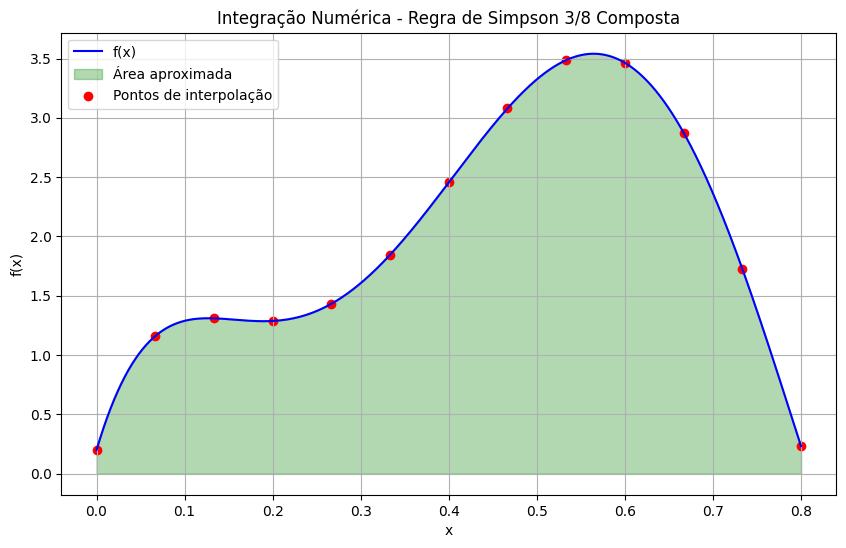

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

def simpson_3_8_composta(f, a, b, n):
    if n % 3 != 0:
        raise ValueError("O número de subintervalos (n) deve ser múltiplo de 3.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    fx = f(x)

    # Coeficientes: 1 para extremos, 3 para os que não são múltiplos de 3, 2 para os múltiplos de 3 (exceto o primeiro e o último)
    coef = []
    for i in range(n + 1):
        if i == 0 or i == n:
            coef.append(1)
        elif i % 3 == 0:
            coef.append(2)
        else:
            coef.append(3)
    coef = np.array(coef)

    integral = (3 * h / 8) * np.sum(coef * fx)
    return integral, x, fx, coef

# Entrada do usuário
print("### Regra de Simpson 3/8 Composta ###")
funcao = input("Digite a função em termos de x: ")
a = float(input("Digite o limite inferior de integração (a): "))
b = float(input("Digite o limite superior de integração (b): "))
n = int(input("Digite o número de subintervalos (deve ser múltiplo de 3): "))

if n % 3 != 0:
    print("Erro: O número de subintervalos deve ser múltiplo de 3.")
else:
    f = lambda x: eval(funcao)
    resultado, x_vals, fx_vals, coef = simpson_3_8_composta(f, a, b, n)

    # Tabela
    tabela = pd.DataFrame({
        'x_i': x_vals,
        'f(x_i)': fx_vals,
        'Coef. Simpson 3/8': coef
    })
    print("\nTabela de valores:")
    print(tabela.to_string(index=False))

    # Integral analítica
    x = sp.Symbol('x')
    funcao_simb = sp.sympify(funcao)
    integral_analitica = sp.integrate(funcao_simb, (x, a, b))
    integral_analitica_valor = float(integral_analitica)
    erro = abs(integral_analitica_valor - resultado)

    # Resultados
    print(f"\nA integral numérica de f(x) no intervalo [{a}, {b}] com {n} subintervalos é aproximadamente: {resultado}")
    print(f"A integral analítica de f(x) no intervalo [{a}, {b}] é: {integral_analitica}")
    print(f"O erro absoluto entre o valor analítico e o estimado é: {erro}")

    # Gráfico
    x_graf = np.linspace(a, b, 1000)
    y_graf = f(x_graf)

    plt.figure(figsize=(10, 6))
    plt.plot(x_graf, y_graf, label='f(x)', color='blue')
    plt.fill_between(x_graf, y_graf, where=[(xi >= a) and (xi <= b) for xi in x_graf], color='green', alpha=0.3, label='Área aproximada')
    plt.scatter(x_vals, fx_vals, color='red', label='Pontos de interpolação')

    plt.title("Integração Numérica - Regra de Simpson 3/8 Composta")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()
